Load Google Drive CSV into Pandas DataFrame for Google Colaboratory

Step 1 : Run the given below code Step 1, You will receive a prompt to enter the verification Code. The Verification code will get if you click the blue color link above the verification code. Copy the verification code after you enter the gmail login id


In [0]:
#Code for Step 1
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Step 2: provide the name of the dataset name(example:creditcard.csv) and also id ( you will get the Id if you open the google dirve folder where the file resides)

In [47]:
listed = drive.ListFile({'q': "title contains 'creditcard.csv' and '1TodthO9NCikcfVCUw-gwpxCj0csZVnAE' in parents"}).GetList()

for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title creditcard.csv, id 1w67TxiqHYxgzMgg4-XZrfVMkK6scPyMl


Step 3 : Pandas can;t read the google drive file directly , Hence you require to map the google drive file to a google script. After Step2 Execution you will recive and id for the file. Copy the id and paste in the given below first line code 
Example : drive.CreateFile({'id':'..id here....'})

In [0]:
train_downloaded = drive.CreateFile({'id': '1w67TxiqHYxgzMgg4-XZrfVMkK6scPyMl'})
train_downloaded.GetContentFile('train.csv')
#test_downloaded = drive.CreateFile({'id': '<TEST_FILE_ID>'})
#test_downloaded.GetContentFile('test.csv')  

In [49]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('train.csv')
df_train.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [0]:
#import warnings filter
from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [51]:
df_train.shape

(284807, 31)

In [52]:
df_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [53]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
#check null values or not
df_train.isnull().sum().max()

0

In [55]:
df_train['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
#Show the Class Distribution in percentage
print('No Frauds',round(df_train['Class'].value_counts()[0]/len(df_train)*100,2),'% of the dataset')
print('No Frauds',round(df_train['Class'].value_counts()[1]/len(df_train)*100,2),'% of the dataset')

No Frauds 99.83 % of the dataset
No Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n(0:No fraud || 1:fraud)')

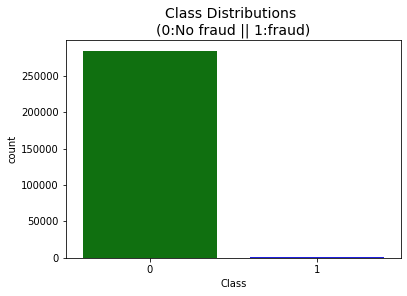

In [57]:
#Display in graph of class distribution of imbalance dataset
import seaborn as sns
import matplotlib.pyplot as plt
colors=['green','blue']
sns.countplot('Class',data = df_train, palette=colors)
plt.title('Class Distributions \n(0:No fraud || 1:fraud)',fontsize=14)


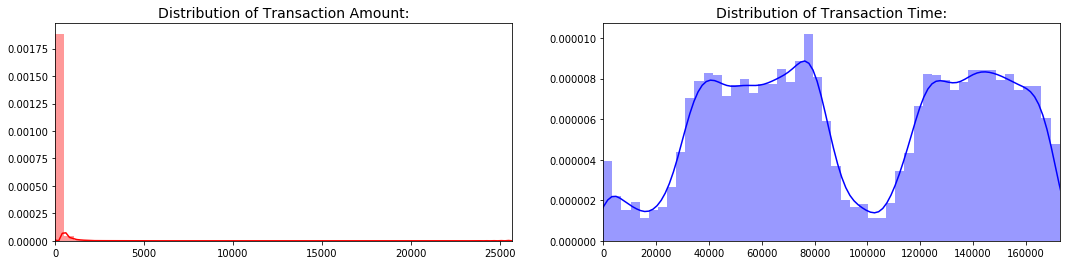

In [58]:
#distribution of class data on column Amount and time
fig,ax =plt.subplots(1,2,figsize=(18,4))
amount_val = df_train['Amount'].values
time_val = df_train['Time'].values
#Distribution plot for Amount (Min vs Max)
sns.distplot(amount_val,ax=ax[0],color='r')
ax[0].set_title('Distribution of Transaction Amount:',fontsize=14)
ax[0].set_xlim([min(amount_val),max(amount_val)])
#Distribution plot for Time (Min vs Max)
sns.distplot(time_val,ax=ax[1],color='b')
ax[1].set_title('Distribution of Transaction Time:',fontsize=14)
ax[1].set_xlim([min(time_val),max(time_val)])
plt.show()

In [0]:
#Scaling Data
from sklearn.preprocessing import StandardScaler, RobustScaler
#Robust scaler is less prone to outliers
std_scaler=StandardScaler()
rob_scaler=RobustScaler()

#Amount Scaling
df_train['scaled_amount']=rob_scaler.fit_transform(df_train['Amount'].values.reshape(-1,1))
#Time Scaling
df_train['scaled_time']=rob_scaler.fit_transform(df_train['Time'].values.reshape(-1,1))

In [0]:
#After scaling,drop the Amount and Time columns
df_train.drop(['Time','Amount'],axis=1,inplace=True) 

In [61]:
#Now Verify the DataFrame after scaling
df_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [0]:
#Using SMOTE method
#from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split

#x=df_train.drop(['Class'],axis=1)
#y=df_train['Class']
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#print("number of rows in x_train:",x_train.shape)
#print("number of rows in x_test:",x_test.shape)
#print("number of rows in y_train:",y_train.shape)
#print("number of rows in y_test:",y_test.shape)

#print(sum(y_train==1))
#print(sum(y_test==0))
#sm=SMOTE(random_state=2)
#_train_result,y_train_result =sm.fit_sample(x_train,y_train.ravel())
#print(sum(y_train_result==1))
#print(sum(y_train_result==0))

In [0]:
#Splitting the data original dataframe
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
#X and Y
X=df_train.drop('Class',axis=1)# take care of all features except class
y=df_train['Class'] #Take only class as y feature

In [64]:
#Apply cross validation using StratifiedKFold
sf=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index,test_index in sf.split(X,y):
  print("train:",train_index,"test:", test_index)
  orig_Xtrain,orig_Xtest=X.iloc[train_index],X.iloc[test_index]
  orig_ytrain,orig_ytest=y.iloc[train_index],y.iloc[test_index]

train: [ 30473  30496  31002 ... 284804 284805 284806] test: [    0     1     2 ... 57017 57018 57019]
train: [     0      1      2 ... 284804 284805 284806] test: [ 30473  30496  31002 ... 113964 113965 113966]
train: [     0      1      2 ... 284804 284805 284806] test: [ 81609  82400  83053 ... 170946 170947 170948]
train: [     0      1      2 ... 284804 284805 284806] test: [150654 150660 150661 ... 227866 227867 227868]
train: [     0      1      2 ... 227866 227867 227868] test: [212516 212644 213092 ... 284804 284805 284806]


In [0]:
#we defined train, test data with new columns orig_columnName
#Turn the data into array
orig_Xtrain = orig_Xtrain.values
orig_Xtest =orig_Xtest.values

orig_ytrain = orig_ytrain.values
orig_ytest = orig_ytest.values

In [66]:
#See if both the train and test label distribution are similarly distributed

import numpy as np
train_unique_label, train_counts_label=np.unique(orig_ytrain, return_counts=True)
test_unique_label, test_counts_label=np.unique(orig_ytest, return_counts=True)
print('-'*100)

print('Label Distributions:\n')
print(train_counts_label/len(orig_ytrain))
print(test_counts_label/len(orig_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions:

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [0]:
#Note usning np.unique - find the unique elements in an array
#return_counts: if true returns the no of time each unique item appear

In [68]:
#Working with Random Subsampling (undersampling method)
# as we are aware we have 492 records for Fraud
# Shuffle the data before crearting the subsamples

df_train=df_train.sample(frac=1)
#amount of fraud classes 492 rows
fraud_df=df_train.loc[df_train['Class']==1]
non_fraud_df=df_train.loc[df_train['Class']==0][:492]
normal_distribution_df=pd.concat([fraud_df,non_fraud_df])

#shuffle dataframe rows
new_df=normal_distribution_df.sample(frac=1,random_state=42)
new_df.head(5)
new_df.shape

(984, 31)

In [69]:
#Check the data sets
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

Distribution of the classses in the subsample dataset:
1    0.5
0    0.5
Name: Class, dtype: float64


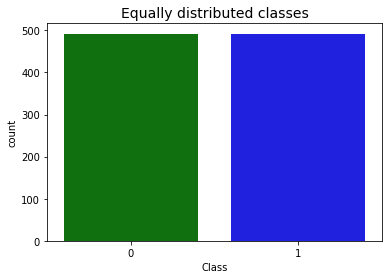

In [70]:
#Equally distributing and correlating data:
print('Distribution of the classses in the subsample dataset:')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class',data=new_df,palette=colors)
plt.title('Equally distributed classes',fontsize=14)
plt.show()

#Using SMOTE method
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split(x,y,test_size=0.3,random_state=0)

print("number of rows in x_train:",x_train.shape)
print("number of rows in x_test:",x_test.shape)
print("number of rows in y_train:",y_train.shape)
print("number of rows in y_test:",y_test.shape)

print(sum(y_train==1))
print(sum(y_test==0))
sm=SMOTE(random_state=2)
x_train_result,y_train_result =sm.fit_sample(x_train,my_train.ravel())
print(sum(y_train_result==1))
print(sum(y_train_result==0))

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
X=new_df.drop('Class',axis=1)
y=new_df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#verify the values into an array
type(X_train) # if values not changed into array then change into array)
type(X_test)
type(y_train)
type(y_test)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [127]:
#Dictionalry classifiers
classifier = {"KNearest":KNeighborsClassifier(metric='euclidean', algorithm='kd_tree'),"DecisionTreeClassifier":DecisionTreeClassifier('entropy')}
from sklearn.model_selection import cross_val_score
for key,classifier in classifier.items():
  classifier.fit(X_train,y_train)
  training_score=cross_val_score(classifier,X_train,y_train,cv=5)
  print("Classifiers:",classifier.__class__.__name__, "Has a training score of ", round(training_score.mean(),2)*100,"% accuracy score")

Classifiers: KNeighborsClassifier Has a training score of  94.0 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of  90.0 % accuracy score


In [128]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import 
#KnearestNeighbors
knears_params={"n_neighbors":list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}
for m,n in knears_params.items():
  grid_knears=GridSearchCV(KNeighborsClassifier(),knears_params)
  grid_knears.fit(X_train,y_train)
  #KNears best estimator
  Knears_neighbors=grid_knears.best_estimator_
  print(grid_knears)
  print(Knears_neighbors)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                       